In [1]:
from ramanchada2 import spectrum
from ramanchada2.spectral_components import GaussPeak, SpectralComponentCollection

# Generate spectrum

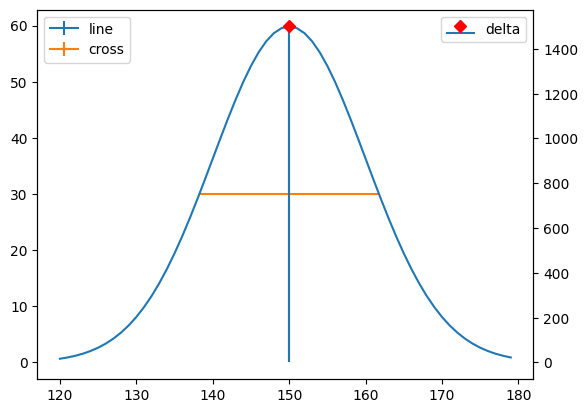

In [2]:
g = GaussPeak(a=1500, x0=150, w=10)
ax = g.plot(draw='line', label='line')
g.plot(ax=ax, draw='cross', label='cross')
ax.legend(loc='upper left')
g.plot(ax=ax.twinx(), draw='delta', label='delta')
None

In [3]:
spe_coll = SpectralComponentCollection([
    GaussPeak(a=1500, x0=250, w=20),
    GaussPeak(a=700, x0=300, w=20),
    GaussPeak(a=700, x0=500, w=30),
])

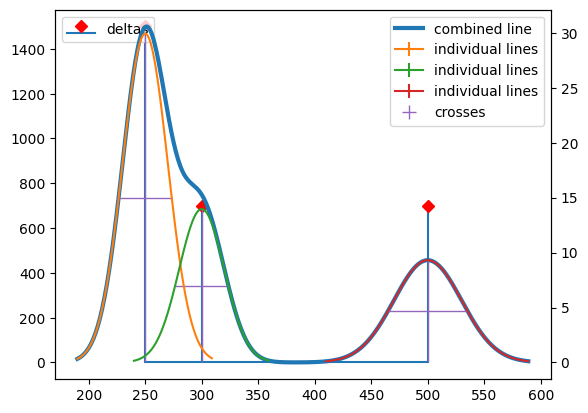

In [4]:
ax = spe_coll.plot(draw='deltas', label='deltas')
ax1 = ax.twinx()
spe_coll.plot(ax=ax1, draw='combined line', label='combined line', lw=3)
spe_coll.plot(ax=ax1, draw='individual lines', label='individual lines')
spe_coll.plot(ax=ax1, draw='crosses', label='crosses')
ax.legend(loc='upper left')
None

In [5]:
spe = spectrum.from_spectral_component_collection(spe_coll, x=800)

# Generate spectrum from SpectralComponentCollection`

# Add Poisson noise to the spectrum

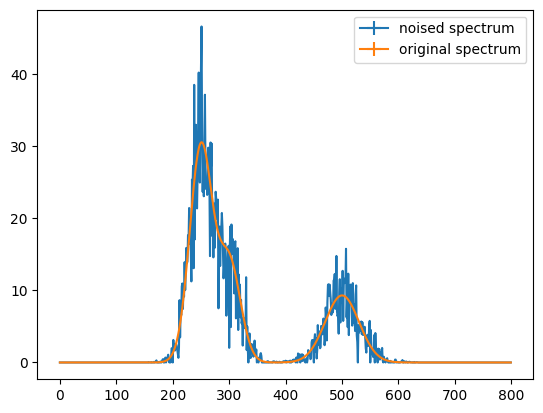

In [6]:
spe1 = spe.add_poisson_noise()
ax = spe1.plot(label='noised spectrum')
spe.plot(ax=ax, label='original spectrum')
None

# Linear scale

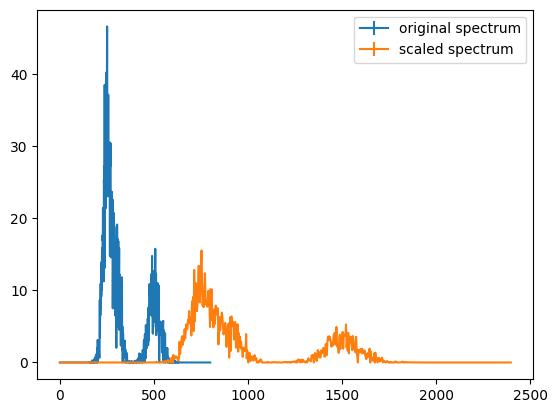

In [7]:
spe2 = spe1.scale_xaxis_linear(factor=3, preserve_integral=True)
ax = spe1.plot(label='original spectrum')
spe2.plot(ax=ax, label='scaled spectrum')
None

# Simple moving average filter

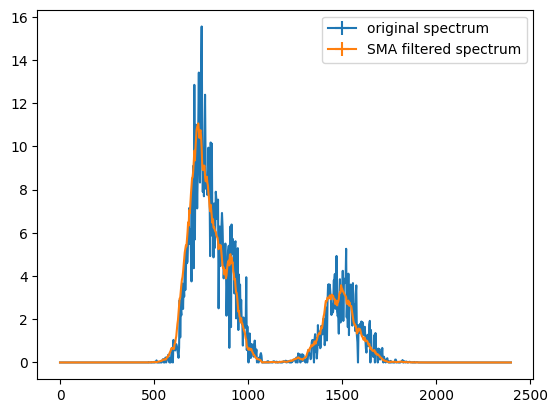

In [8]:
spe3 = spe2.moving_average()
ax = spe2.plot(label='original spectrum')
spe3.plot(ax=ax, label='SMA filtered spectrum')
None

# HDF5 example

In [9]:
cachefile = 'peak.cha'
spe1 = spectrum.from_cache_or_calc(cachefile=cachefile, required_steps=[
    {'proc': 'from_delta_lines', 'args': [], 'kwargs': {'nbins': 3000, 'deltas': {200: 100, 600: 50, 1000: 150, 1500: 70}}},
    {'proc': 'convolve', 'args': ['gaussian'], 'kwargs': {'sigma': 5}},
    {'proc': 'normalize', 'args': [], 'kwargs': {}},
    {'proc': 'add_baseline', 'args': [], 'kwargs': {'n_freq': 20, 'pedestal': 0.2, 'amplitude': 0.15}},
    {'proc': 'add_poisson_noise', 'args': [0.002], 'kwargs': {}},
    {'proc': 'normalize', 'args': [], 'kwargs': {}},
    {'proc': 'find_peak_multipeak_filter', 'args': [], 'kwargs': {'prominence': 0.1, 'width': 25}},
    {'proc': 'fit_peaks_filter', 'args': [], 'kwargs': {'profile': 'Gaussian'}},
])
spe2 = spectrum.from_cache_or_calc(cachefile=cachefile, required_steps=[
    {'proc': 'from_delta_lines', 'args': [], 'kwargs': {'nbins': 3000, 'deltas': {200: 100, 600: 50, 1000: 150, 1500: 70}}},
    {'proc': 'convolve', 'args': ['gaussian'], 'kwargs': {'sigma': 20}},
    {'proc': 'normalize', 'args': [], 'kwargs': {}},
    {'proc': 'add_baseline', 'args': [], 'kwargs': {'n_freq': 20, 'pedestal': 0.2, 'amplitude': 0.15}},
    {'proc': 'add_poisson_noise', 'args': [0.002], 'kwargs': {}},
    {'proc': 'normalize', 'args': [], 'kwargs': {}},
    {'proc': 'find_peak_multipeak_filter', 'args': [], 'kwargs': {'prominence': 0.1, 'width': 20}},
    {'proc': 'fit_peaks_filter', 'args': [], 'kwargs': {'profile': 'Gaussian'}},
])
spe3 = spectrum.from_cache_or_calc(cachefile=cachefile, required_steps=[
    {'proc': 'from_delta_lines', 'args': [], 'kwargs': {'nbins': 3000, 'deltas': {200: 100, 600: 50, 1000: 150, 1500: 70}}},
    {'proc': 'convolve', 'args': ['gaussian'], 'kwargs': {'sigma': 20}},
    {'proc': 'normalize', 'args': [], 'kwargs': {}},
    {'proc': 'add_baseline', 'args': [], 'kwargs': {'n_freq': 20, 'pedestal': 0.2, 'amplitude': 0.15}},
    {'proc': 'add_poisson_noise', 'args': [0.001], 'kwargs': {}},
    {'proc': 'normalize', 'args': [], 'kwargs': {}},
    {'proc': 'find_peak_multipeak_filter', 'args': [], 'kwargs': {'prominence': 0.1, 'width': 20}},
    {'proc': 'fit_peaks_filter', 'args': [], 'kwargs': {'profile': 'Gaussian'}},
])

<Axes: >

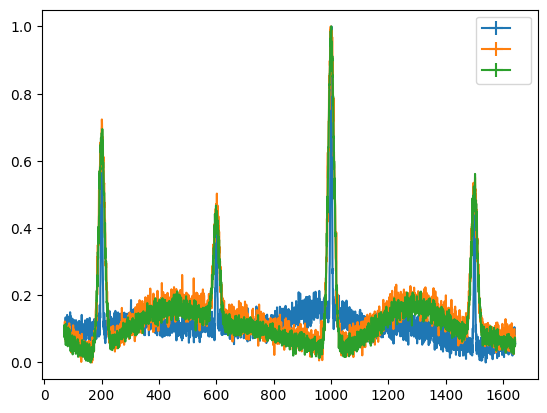

In [10]:
ax = spe1.plot()
spe2.plot(ax=ax)
spe3.plot(ax=ax)